# Telecom Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [248]:
# importing libraries & data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('Churn_data.csv')

## 1. [BASIC INFORMATION]

In [2]:
# data head
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

## 2. [DATA PREPROCESSING]

In [3]:
# dataset's characteristics
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[5233-GEEAX, 3097-PYWXL]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[15, 46]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[No phone service, Yes]"
8,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"


- We have no missing value, but as we can see the column TotalCharges have an object data type but when we sampled it they had some numerical value. Let's try to convert this column data type to float
- But, it seems there is some string data that could not be converted to float, Let's try to find the row that is problematic

In [3]:
# checking problematic data
df[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- There are 11 datas with string space character at the TotalCharges Column
- We will try to replace this string value with 0 and convert the Total Charges to the float data type now

In [2]:
# data contingency
data = df.copy()

# function to return 0
def space(cols):
    if cols == ' ':
        return 0
    else:
        return cols

# applying the functions
data['TotalCharges'] = data['TotalCharges'].apply(space)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [6]:
# checking the data row that previously had string values to make sure that it has been replaced by 0
data[data['TotalCharges']== 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [11]:
# tenure value counts
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
# data rows with 0 tenure
data['tenure'].value_counts()[0]

11

In [13]:
# data rows with 0 totalCharges
len(data[data['TotalCharges']== 0])

11

- From the tenure column value counts, we may see that the only columns that has 0 tenure is only 11 datapoints, which is the same number as the amount of 0 value in TotalCharges column.
- And as it turns out, that all the rows thats has 0 value in TotalCharges has also 0 tenure
- It may be said that their totalcharges of 0 is because of the fact that they are still new customers (0 months of tenure) which makes much more sense
- Before we proceed, we will replace the SeniorCitizen feature value with 0 as No and 1 as Yes.

In [3]:
# creating & applying senior function on data
def senior(cols):
    if cols == 1:
        return 'Yes'
    else:
        return 'No';
data['SeniorCitizen'] = data['SeniorCitizen'].apply(senior)
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

## 3. [EXPLORATORY DATA ANALYSIS]

In [27]:
# description for numerical features
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# description for categorical features
data.describe(exclude = 'number').T

,count,unique,top,freq
customerID,7043,7043,1614-JBEBI,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [17]:
# payment methods
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

- I find it interesting that some people still pay their bills via mailed check, lets try to filter the dataset to only get the data with Mailed check class from the PaymentMethod feature

In [29]:
# showing rows that use mailed check for their PaymentMethod
pd.set_option('display.max_rows', None)
data[data['PaymentMethod']== 'Mailed check']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
32,6827-IEAUQ,Female,0,Yes,Yes,27,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Mailed check,66.15,1874.45,No
40,8865-TNMNX,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,No
42,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


- I'm curious, is there any difference between people who have partner or not for people who choose mailed check. Let's try to visualize this by using the countplot. I would also like to create a grid with the Payment Method as the columns to see the difference between each payment method.

Text(0.5, 1.0, 'Mailed Check Payment Method grouped by Partner')

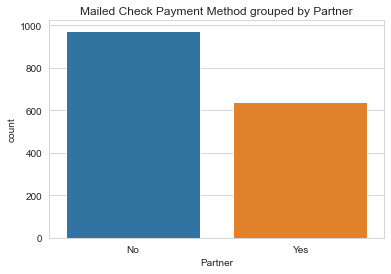

In [18]:
# mailed check payment method grouped by partner
sns.set_style("whitegrid")
sns.countplot(x = 'Partner', data = data[data['PaymentMethod'] == 'Mailed check'])
plt.title('Mailed Check Payment Method grouped by Partner')

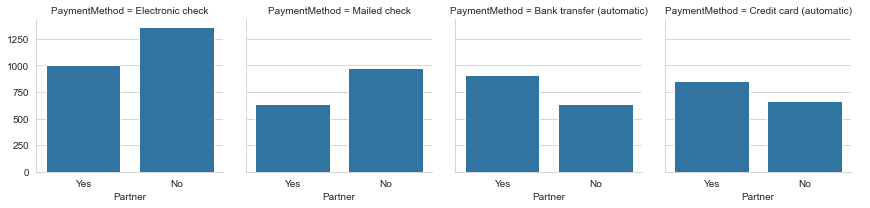

In [19]:
# payment methods grouped by partner
sns.set_style("whitegrid")
sns.FacetGrid(data=df, col='PaymentMethod').map(sns.countplot,'Partner',order=df.Partner.unique()).add_legend()

In [20]:
# electronic check value counts
data[data['PaymentMethod'] == 'Electronic check'].groupby('Partner')['PaymentMethod'].describe()

,count,unique,top,freq
Partner,,,,
No,1362,1,Electronic check,1362
Yes,1003,1,Electronic check,1003


In [21]:
# mailed check value counts
data[data['PaymentMethod'] == 'Mailed check'].groupby('Partner')['PaymentMethod'].describe()

,count,unique,top,freq
Partner,,,,
No,974,1,Mailed check,974
Yes,638,1,Mailed check,638


In [22]:
# bank transfer value counts
data[data['PaymentMethod'] == 'Bank transfer (automatic)'].groupby('Partner')['PaymentMethod'].describe()

,count,unique,top,freq
Partner,,,,
No,637,1,Bank transfer (automatic),637
Yes,907,1,Bank transfer (automatic),907


In [23]:
# credit card value counts
data[data['PaymentMethod'] == 'Credit card (automatic)'].groupby('Partner')['PaymentMethod'].describe()

,count,unique,top,freq
Partner,,,,
No,668,1,Credit card (automatic),668
Yes,854,1,Credit card (automatic),854


- It is interesting that people who paid via Mailed Check & Electronic Check are less likely to have partner compared to the other payment methods. 
- Let's try to use another feature to find any interesting finding, this time I would use the tenure feature with distribution plot. Just like before, I would create grid with different payment method as the columns.

Text(0.5, 1.0, 'Tenure distribution with Mailed Check Payment Method')

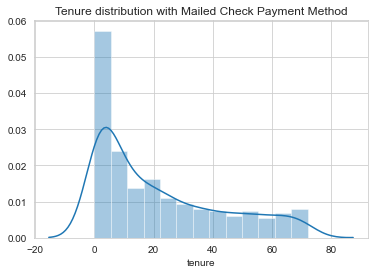

In [114]:
# tenure distribution with mailed check payment method
sns.set_style("whitegrid")
sns.distplot(data[data['PaymentMethod']=='Mailed check']['tenure'])
plt.title('Tenure distribution with Mailed Check Payment Method')

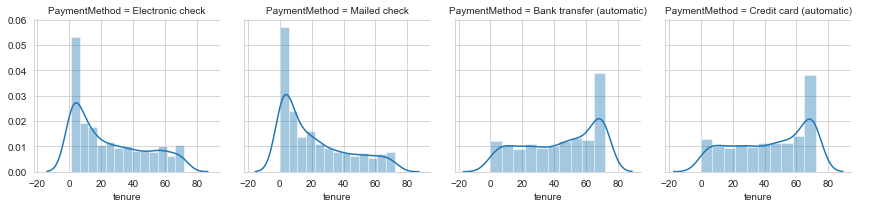

In [120]:
# tenure distribution by payment methods
sns.set_style("whitegrid")
sns.FacetGrid(data=df, col='PaymentMethod').map(sns.distplot,'tenure').add_legend()

In [121]:
# tenure description on mailed check customers
data[data['PaymentMethod']=='Mailed check']['tenure'].describe()

count    1612.000000
mean       21.830025
std        21.218374
min         0.000000
25%         3.000000
50%        15.000000
75%        36.000000
max        72.000000
Name: tenure, dtype: float64

In [122]:
# tenure value counts on mailed check customers
data[data['PaymentMethod']=='Mailed check']['tenure'].value_counts()

1     257
2      76
3      73
4      55
7      47
5      42
6      39
9      38
10     36
8      33
13     31
12     29
17     28
18     28
15     28
22     25
24     24
23     23
19     23
11     21
27     20
29     20
14     20
21     20
20     20
25     19
35     19
52     18
72     17
64     17
16     16
34     16
40     15
38     15
71     14
28     14
46     14
47     14
33     13
32     13
59     13
61     13
67     13
30     12
53     12
39     12
56     12
63     12
48     11
37     11
44     11
26     11
31     11
36     10
41     10
45     10
69     10
50     10
51     10
42      9
70      9
57      9
43      9
55      8
54      8
60      8
66      8
0       8
58      7
65      7
68      7
49      6
62      5
Name: tenure, dtype: int64

In [131]:
# count of customers who has 0-12 tenure (<= 1 year)
sum = 0
for i in range(12):
    sum += data[data['PaymentMethod']=='Mailed check']['tenure'].value_counts()[i]
print(sum)

725


In [133]:
# count of customers who has 13-24 tenure (> 1 year s.d. <=2 year)
sum2 = 0
for i in range(13,25):
    sum2 += data[data['PaymentMethod']=='Mailed check']['tenure'].value_counts()[i]
print(sum2)

286


In [137]:
# count of customers who has 25-36 tnure (> 2 year s.d. <=3 year)
sum2 = 0
for i in range(25,36):
    sum2 += data[data['PaymentMethod']=='Mailed check']['tenure'].value_counts()[i]
print(sum2)

168


In [138]:
# count of customers who has 37-48 tnure (> 3 year s.d. <=4 year)
sum3 = 0
for i in range(25,36):
    sum3 += data[data['PaymentMethod']=='Mailed check']['tenure'].value_counts()[i]
print(sum3)

168


In [5]:
# checking on senior citizenship feature
data[data['PaymentMethod']=='Mailed check']['SeniorCitizen'].value_counts()

No     1518
Yes      94
Name: SeniorCitizen, dtype: int64

- From the countplots above we may see that in overall, the customers who uses Mailed Check Payment Method 60,42% doesnt have any partner & 39,58% have partners (if you pick at random, you will have higher chance to pick the ones whos doesnt have a partner)

- From the distplots above we may see that in overall, the customers who uses Mailed Check Payment Method has lots of new users (the highest peaks range from 0-10 months of tenure a.k.a below one year). It is also shown the the highest value counts range from 1-4 months of tenure with 1 months 257 customers, 2 months 76 customers, 3 months 73 customers, and 4 months 55 customers. It is also shown that 44.48% of them (725 customers) are 0-12 months user, that can be said, as relatively new customers
 
- From the value counts by Mailed check on SeniorCitizen feature, it shows that most of them (94.16%) are not senior citizens This is quite peculiar since usually the senior citizens are the ones who are more conservative and probably request payment via Mailed check. It seems that in this case it is not true.

- From all these findings, it may be said that the customers who uses Mailed Check Payment Method are probably relatively young (not senior citizens), single (does not have any partners), and lots of them are relatively new users (0-2 months)

- That is enough EDA between features, now let's focus to the our target (Churn). 

In [30]:
# grouped by Churn description for numerical features
data.groupby('Churn').describe().T

Churn                          No          Yes
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
               25%     572.900000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

In [35]:
# grouped by Churn description for numerical features
pd.options.display.max_rows = 68
data.drop('customerID', axis = 1).groupby('Churn').describe(exclude='number').T

Churn                                No               Yes
gender           count             5174              1869
                 unique               2                 2
                 top               Male            Female
                 freq              2625               939
SeniorCitizen    count             5174              1869
                 unique               2                 2
                 top                 No                No
                 freq              4508              1393
Partner          count             5174              1869
                 unique               2                 2
                 top                Yes                No
                 freq              2733              1200
Dependents       count             5174              1869
                 unique               2                 2
                 top                 No                No
                 freq              3390              1543
PhoneService     count             5174              1869
                 unique               2                 2
                 top                Yes               Yes
                 freq              4662              1699
MultipleLines    count             5174              1869
                 unique               3                 3
                 top                 No               Yes
                 freq              2541               850
InternetService  count             5174              1869
                 unique               3                 3
                 top                DSL       Fiber optic
                 freq              1962              1297
OnlineSecurity   count             5174              1869
                 unique               3                 3
                 top                 No                No
                 freq              2037              1461
OnlineBackup     count             5174              1869
                 unique               3                 3
                 top                Yes                No
                 freq              1906              1233
DeviceProtection count             5174              1869
                 unique               3                 3
                 top                 No                No
                 freq              1884              1211
TechSupport      count             5174              1869
                 unique               3                 3
                 top                 No                No
                 freq              2027              1446
StreamingTV      count             5174              1869
                 unique               3                 3
                 top                Yes                No
                 freq              1893               942
StreamingMovies  count             5174              1869
                 unique               3                 3
                 top                Yes                No
                 freq              1914               938
Contract         count             5174              1869
                 unique               3                 3
                 top     Month-to-month    Month-to-month
                 freq              2220              1655
PaperlessBilling count             5174              1869
                 unique               2                 2
                 top                Yes               Yes
                 freq              2771              1400
PaymentMethod    count             5174              1869
                 unique               4                 4
                 top       Mailed check  Electronic check
                 freq              1304              1071

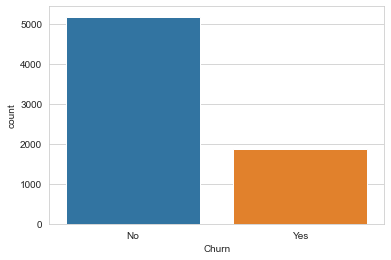

In [139]:
# churn group count
sns.set_style("whitegrid")
sns.countplot(x = 'Churn', data = data)

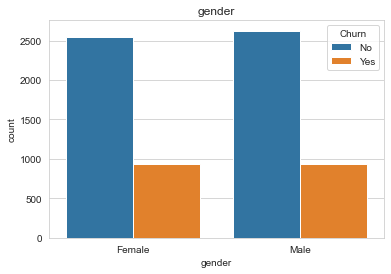

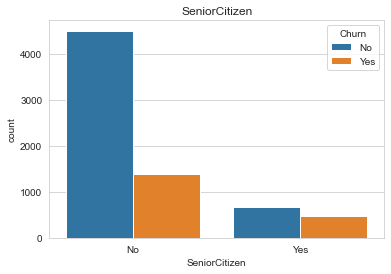

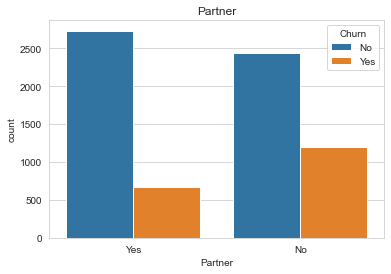

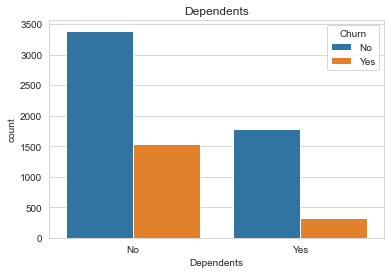

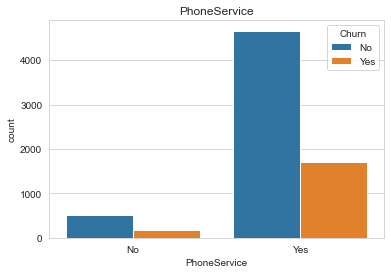

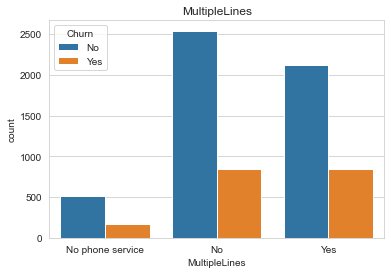

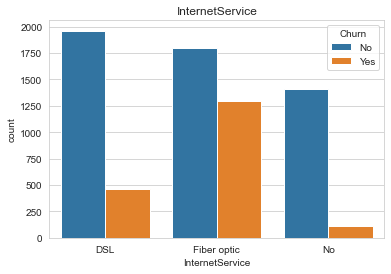

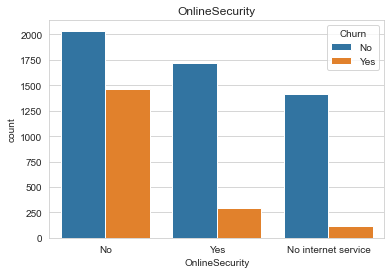

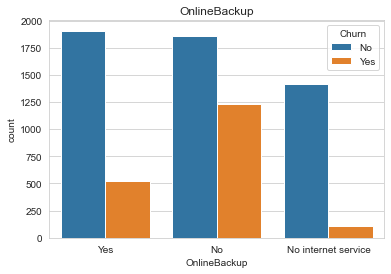

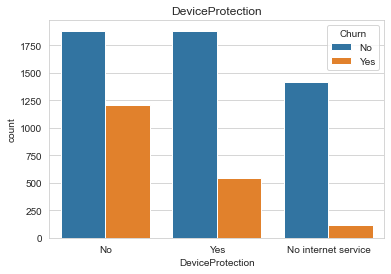

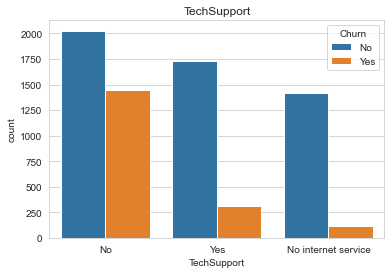

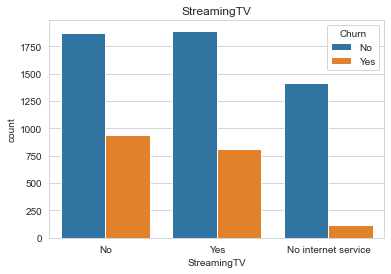

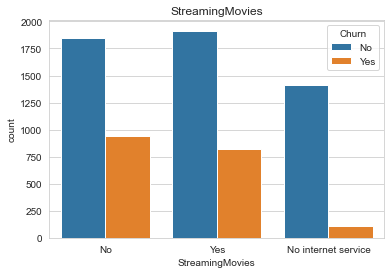

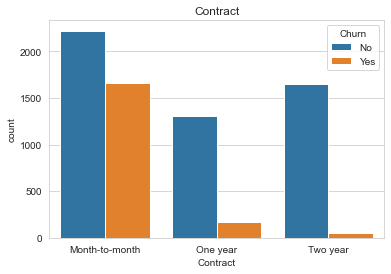

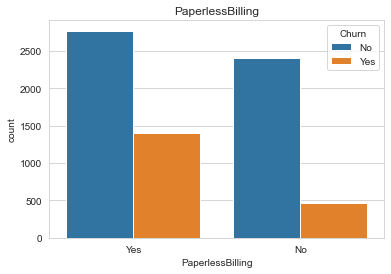

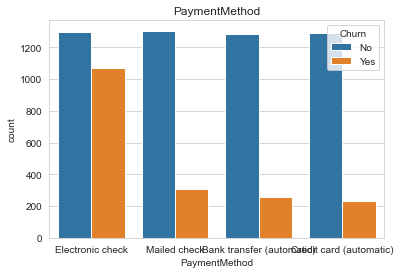

In [191]:
# categorical feature visualizations grouped by Churn feature
for i in data.drop(['customerID','Churn'],axis=1).select_dtypes('object').columns:
    sns.countplot(data = data, x = i, hue='Churn')
    plt.title(i)
    plt.show()

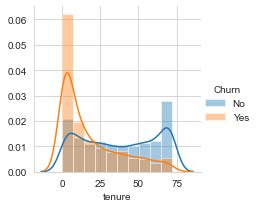

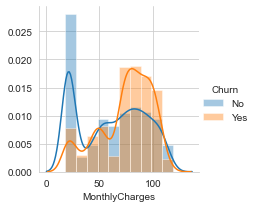

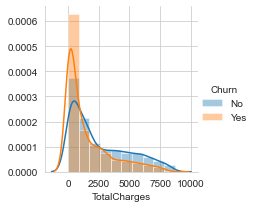

In [185]:
# numerical feature visualizations grouped by Churn feature
for i in data.select_dtypes(exclude = 'object').columns:
    _, bins = np.histogram(data[i])
    g = sns.FacetGrid(data, hue="Churn")
    g = g.map(sns.distplot, i, bins = bins).add_legend()
    plt.show()

In [36]:
# defining cramers v function to see the association between two categorical features
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r -((r-1)**2)/(n-1)
    kcorr = k -((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# cramer's v value for categorical features towards Churn feature
for i in data.drop(['customerID', 'Churn'], axis=1).select_dtypes('object').columns:
    print('###',i)
    print('Cramers V: {}'.format(cramers_v(data['Churn'], data[i])))

### gender
Cramers V: 0.0
### SeniorCitizen
Cramers V: 0.14999108255137
### Partner
Cramers V: 0.14966271044155077
### Dependents
Cramers V: 0.1634481432749282
### PhoneService
Cramers V: 0.0
### MultipleLines
Cramers V: 0.03639958908232507
### InternetService
Cramers V: 0.3220367323307425
### OnlineSecurity
Cramers V: 0.3470160668827287
### OnlineBackup
Cramers V: 0.291850036724674
### DeviceProtection
Cramers V: 0.28109492388964397
### TechSupport
Cramers V: 0.3425261587493694
### StreamingTV
Cramers V: 0.22990176915403476
### StreamingMovies
Cramers V: 0.23035147282444215
### Contract
Cramers V: 0.40979839182553446
### PaperlessBilling
Cramers V: 0.1911405817441778
### PaymentMethod
Cramers V: 0.3026771381187204


In [28]:
# defining correlation ratio function to see the association between numerical-categorical features
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

# correlation ratio value for numerical features towards Churn feature
for i in data.select_dtypes(exclude= 'object').columns:
    print('###',i)
    print('Correlation Ratio: {}'.format(correlation_ratio(data['Churn'], data[i])))

### tenure
Correlation Ratio: 0.35222867011307796
### MonthlyCharges
Correlation Ratio: 0.193356422237847
### TotalCharges
Correlation Ratio: 0.19832426260399555


- From the plots, it can be seen that: 
    - For the InternetService feature, there is some significant amount of churn in the Fiber Optic category 
    - For the OnlineSecurity feature, there is some significant amount of churn in the No category
    - For the TechSupport feature, there is some significant amount of churn in the No category
    - For the Contract feature, there is some significant amount of churn in the month-to-month category
    - For the PaymentMethod feature, there is some significant amount of churn in the Electronic Check category
    - For the tenure feature, there is some significant amount of churn in the earliest range


- From the Cramers V & Correlation Ratio (towards Churn Feature), it can be seen that:
    - InternetService has a Cramers V value of 0.3220367323307425 which is a strong association
    - OnlineSecurity has a Cramers V value of 0.3470160668827287 which is a strong association
    - TechSupport has a Cramers V value of 0.3425261587493694 which is a strong association
    - Contract has a Cramers V value of 0.40979839182553446 which is a strong association
    - PaymentMethod has a Cramers V value of 0.3026771381187204 which is a strong association
    - Tenure has a Correlation Ratio value of 0.35222867011307796 which is a strong association 
  

- It appears there are some strong associations in InternetService, OnlineSecurity, TechSupport, Contract, PaymentMethod, and Tenure feature towards Churn. These are interesting findings and should be kept in mind for further analysis.

## 4. [CLUSTERING ANALYSIS - UNSUPERVISED ML]

In [10]:
# creating further data contingency
mydata = data.copy()
mydata['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# relabeling churn feature
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
mydata['Churn'] = labeler.fit_transform(mydata['Churn'])
mydata['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [12]:
# dropping customer ID
mydata = mydata.drop('customerID',axis=1)
mydata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
# creating dummy variables
mydummy = pd.get_dummies(data= mydata, drop_first= True, columns = mydata.select_dtypes(exclude = 'number').columns)
mydummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

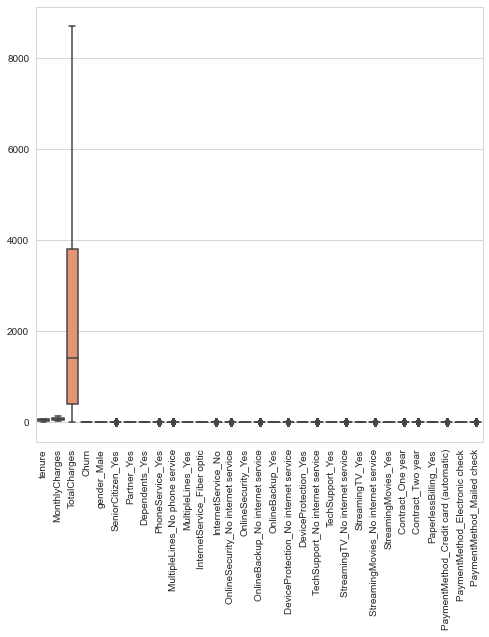

In [44]:
# wirst, use the boxplot to check all the data distribution
plt.figure(figsize = (8,8))
sns.boxplot(data = mydummy)
plt.xticks(rotation = 90)

- Just from the boxplot, we could see that the scale is not similar. In this case, lets rescale all the data by using the StandardScaler then check the data one more time to know our data distribution

In [14]:
# creating contingency data for scaling
from sklearn.preprocessing import StandardScaler
dummy = mydummy.copy()
dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
# scaled data head
scaler = StandardScaler()
dummy = scaler.fit_transform(dummy)
dummy = pd.DataFrame(dummy, columns = mydummy.columns)

# scaled data contingency for next steps
dum = dummy.copy()

# dropping Churn feature
dummy = dummy.drop('Churn',axis=1)
dummy.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.172165,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.958066,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.193672,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.938874,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

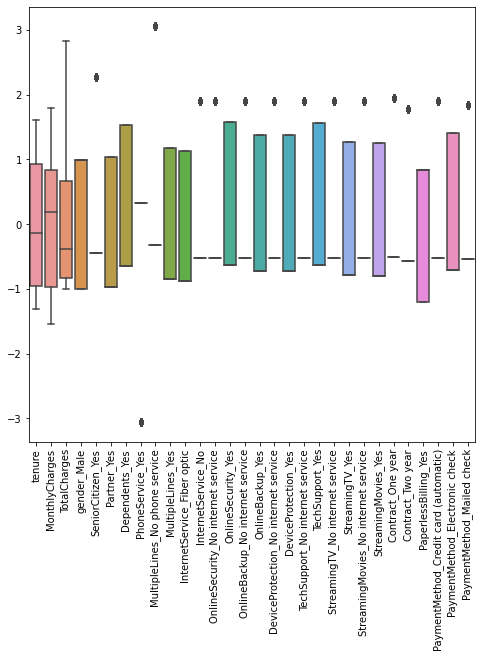

In [36]:
# boxplotting again to check the data distribution on scaled data
plt.figure(figsize = (8,8))
sns.boxplot(data = dummy)
plt.xticks(rotation = 90)

- We can see that the scaled data's distribution range are in a more similar range which is perfect for our next steps.
- We can also see that our dummy features are a lot, therefore, that let's use Pricipal Component Analysis (PCA) to reduce our features to 2.

In [48]:
# using PCA and make it as two features
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=101)
pca.fit(dummy)

# showing PC1 & PC2
x_pca = pca.transform(dummy)
x_pca = pd.DataFrame(x_pca, columns = ['PC1','PC2'])
x_pca

,PC1,PC2
0,-0.432402,-3.150994
1,-0.204024,-0.794405
2,-0.160382,-2.089736
3,-0.898671,-0.878803
4,-0.613839,-3.175062
...,...,...
7038,-1.895955,1.301241
7039,-3.132402,3.147387
7040,-0.342003,-2.486628
7041,-0.616559,-2.049118


In [340]:
# pca explained variance ratios
pca.explained_variance_ratio_

array([0.33179753, 0.11983851])

In [347]:
# sum of our pca explained variance ratios
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.45163604609790475

- Our 2 PC only explained around 45 % variance of the data, but we could work with that right now. Let's use the scatter plot to see the distribution of the 2 PC with the Churn feature as the hue

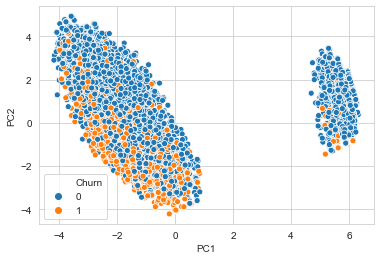

In [49]:
x_pca['Churn'] = mydummy['Churn']
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Churn', data = x_pca)

- It seems that our 2 PC gives out 2 different groups. It is really interesting, though it isn't able to separate based on our Churn feature, but it might end up with another fascinating observation. 

- Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I've already done some analysis and find the best parameter we could use. Let's create the scatter plot to compare the separation performance of each model. 

In [50]:
# modelling each clustering approach
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN

kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca[['PC1', 'PC2']])
x_pca['KMeans'] = kmeans.labels_

dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(x_pca[['PC1', 'PC2']])
x_pca['DBScan'] = dbscan.labels_

hdbscan = HDBSCAN(min_cluster_size=2, min_samples=25)
hdbscan.fit(x_pca[['PC1', 'PC2']])
x_pca['HDBScan'] = hdbscan.labels_

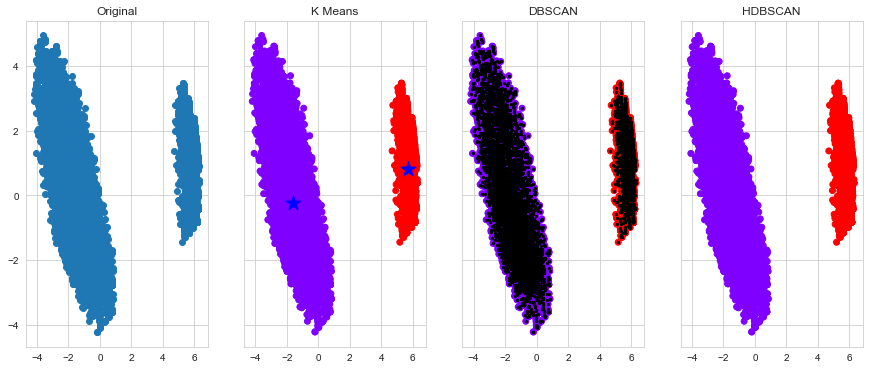

In [51]:
# scatter plots on each clustering approach
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey = True, figsize = (15,6))

ax1.set_title('Original')
ax1.scatter(x_pca['PC1'], x_pca['PC2'])

centroids = kmeans.cluster_centers_
ax2.set_title('K Means')
ax2.scatter(x_pca['PC1'], x_pca['PC2'],c=x_pca['KMeans'],cmap='rainbow')
ax2.scatter(centroids[:,0], centroids[:,1], marker = '*', c= 'b', s=250)

core = dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(x_pca['PC1'], x_pca['PC2'],c=x_pca['DBScan'], cmap = 'rainbow')
ax3.scatter(core[:,0], core[:,1], marker = 'o', c='black', s = 5)

ax4.set_title('HDBSCAN')
ax4.scatter(x_pca['PC1'], x_pca['PC2'],c=x_pca['HDBScan'], cmap = 'rainbow')

- It seems that all of our models gives out the 2 different clusters, just like we expected. Now, let's return to the label from the KMeans use the pair plot to see the relation between the numerical value with the label as the hue (I will personally name it KMeans-Category)

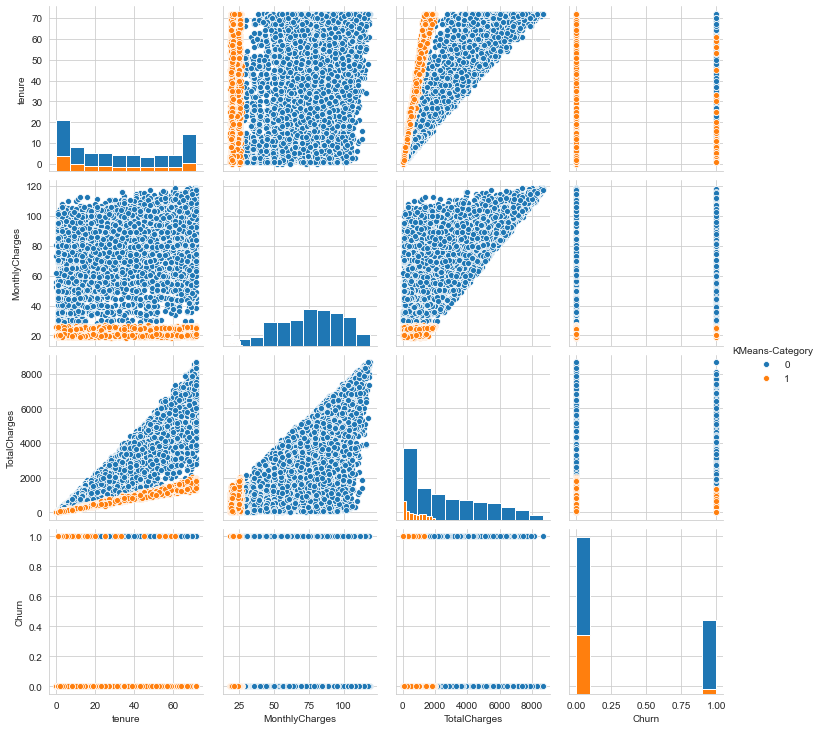

In [384]:
# data contingency & pairplotting with the labels as the hue
mydata2 = mydata.copy()
mydata2['KMeans-Category'] = x_pca['KMeans'].astype('int')
sns.pairplot(mydata2[['tenure','MonthlyCharges','TotalCharges','Churn','KMeans-Category']], hue = 'KMeans-Category', diag_kind = 'hist')

In [366]:
# KMeans-Category value counts
mydata2['KMeans-Category'].value_counts()

0    5517
1    1526
Name: KMeans-Category, dtype: int64

From these plottings we could that:
- Label 0 (Blue): is a group of customers consist mostly of higher MonthlyCharges & TotalCharges that resides in a relatively higher range of tenure. Theres a lot of them who churns but theres alot of them too that stays
- Label 1 (Yellow): is a group of customers consist mostly of lower MonthlyCharges & TotalCharges that resides in a relatively lower range of tenure. Most of them didnt churn.

## 5.1 [PREDICTIVE ANALYSIS - SUPERVISED ML]

In [16]:
# dummy columns
mydummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
# selecting features 
IV = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# independent variables
x = mydummy[IV]

# dependent/target variable
y = mydummy['Churn']

In [18]:
# making training data & test data 80% : 20%
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 101)

# SMOTE oversampling on splitted data to prevent information leakage to the test set
from imblearn.over_sampling import SMOTE
from collections import Counter
y_train = y_train.astype('int') 
smo = SMOTE(random_state=0, sampling_strategy='minority')
x_trainres, y_trainres = smo.fit_resample(x_train, y_train)
print(sorted(Counter(y_trainres).items()))

# splitting & SMOTE oversampling the scaled data from before
X_Train, X_Test, Y_Train, Y_Test = train_test_split(dum.drop('Churn', axis=1), dum['Churn'], test_size=0.2, random_state= 101)
Y_Train = Y_Train.astype('int') 
SMO = SMOTE(random_state=0, sampling_strategy='minority')
X_Trainres, Y_Trainres = SMO.fit_resample(X_Train, Y_Train)
print(sorted(Counter(Y_Trainres).items()))

[(0, 4148), (1, 4148)]
[(0, 4148), (1, 4148)]


## ------------- ON ACCURACY -------------

### Normal Data
LR: 0.806345 (0.017231)
LDA: 0.800669 (0.014099)
SVC: 0.736252 (0.017156)
DT: 0.731267 (0.013572)
RF: 0.795165 (0.014225)
KNN: 0.757901 (0.015580)
NB: 0.712099 (0.023394)
XGB: 0.789836 (0.023398)

### Oversampled Data
LR2: 0.815848 (0.067335)
LDA2: 0.819709 (0.076672)
SVC2: 0.627254 (0.071968)
DT2: 0.796927 (0.073769)
RF2: 0.844779 (0.073066)
KNN2: 0.784645 (0.099237)
NB2: 0.789949 (0.103886)
XGB2: 0.842497 (0.087493)


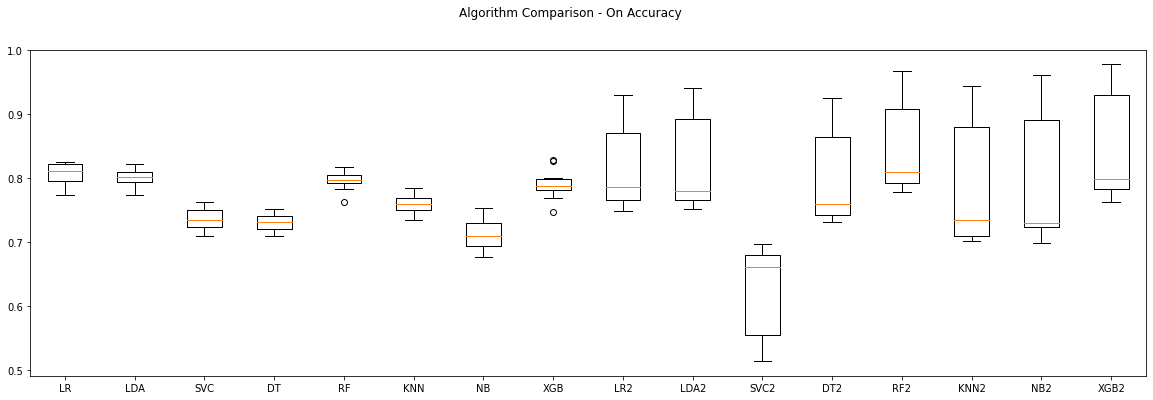

In [48]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score # to evaluate our model
from sklearn.model_selection import GridSearchCV

# algorithms  to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))
models2 = []
models2.append(('LR2', LogisticRegression()))
models2.append(('LDA2', LinearDiscriminantAnalysis()))
models2.append(('SVC2', SVC()))
models2.append(('DT2', DecisionTreeClassifier()))
models2.append(('RF2', RandomForestClassifier()))
models2.append(('KNN2', KNeighborsClassifier()))
models2.append(('NB2', BernoulliNB()))
models2.append(('XGB2', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'accuracy'

print('### Normal Data')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

print('\n### Oversampled Data')

# evaluate each model in turn for oversampled data
for name, model in models2:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Trainres, Y_Trainres, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_trainres, y_trainres, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
       
            
# boxplot algorithm comparison for normal & oversampled data
fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison - On Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## ------------- ON RECALL -------------

### Normal Data
LR: 0.541518 (0.052086)
LDA: 0.564262 (0.050635)
SVC: 0.000000 (0.000000)
DT: 0.500047 (0.034372)
RF: 0.488871 (0.032025)
KNN: 0.508717 (0.029174)
NB: 0.801672 (0.032708)
XGB: 0.524073 (0.042889)

### Oversampled Data
LR2: 0.775321 (0.098895)
LDA2: 0.799295 (0.093492)
SVC2: 0.608103 (0.064112)
DT2: 0.721405 (0.126523)
RF2: 0.763244 (0.131970)
KNN2: 0.892706 (0.030739)
NB2: 0.854590 (0.063910)
XGB2: 0.750166 (0.155336)


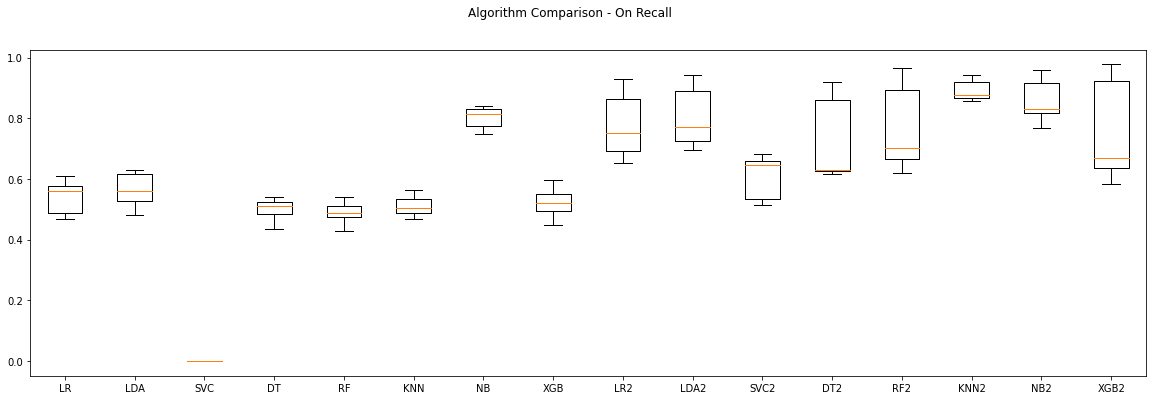

In [49]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))
models2 = []
models2.append(('LR2', LogisticRegression()))
models2.append(('LDA2', LinearDiscriminantAnalysis()))
models2.append(('SVC2', SVC()))
models2.append(('DT2', DecisionTreeClassifier()))
models2.append(('RF2', RandomForestClassifier()))
models2.append(('KNN2', KNeighborsClassifier()))
models2.append(('NB2', BernoulliNB()))
models2.append(('XGB2', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'recall'

print('### Normal Data')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

print('\n### Oversampled Data')

# evaluate each model in turn for oversampled data
for name, model in models2:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Trainres, Y_Trainres, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_trainres, y_trainres, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
       
            
# boxplot algorithm comparison for normal & oversampled data
fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison - On Recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## ------------- ON PRECISION -------------

### Normal Data
LR: 0.661536 (0.061928)
LDA: 0.638866 (0.052179)
SVC: 0.000000 (0.000000)
DT: 0.500616 (0.041856)
RF: 0.643803 (0.062858)
KNN: 0.545383 (0.051913)
NB: 0.473873 (0.041253)
XGB: 0.621781 (0.071983)

### Oversampled Data
LR2: 0.703386 (0.203943)
LDA2: 0.698550 (0.204950)
SVC2: 0.615174 (0.257524)
DT2: 0.680312 (0.219466)
RF2: 0.733138 (0.183620)
KNN2: 0.652029 (0.234036)
NB2: 0.653111 (0.232628)
XGB2: 0.723809 (0.189825)


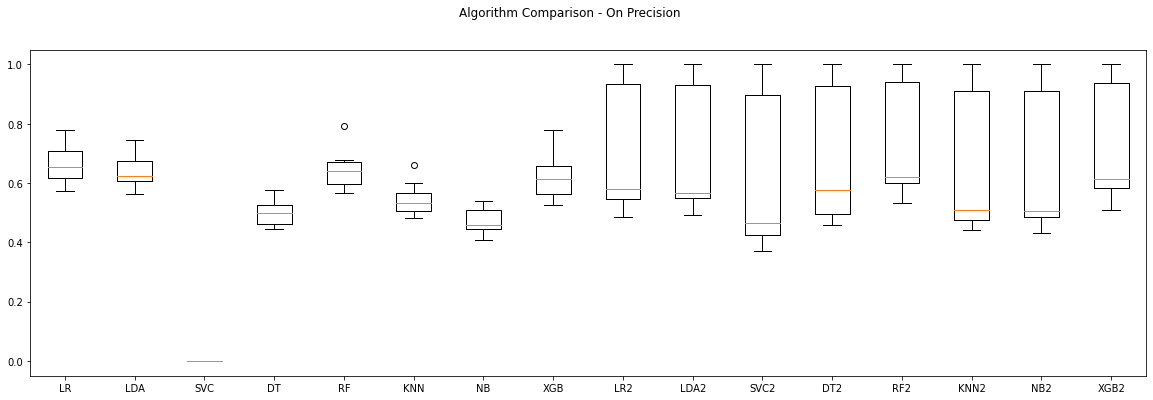

In [50]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))
models2 = []
models2.append(('LR2', LogisticRegression()))
models2.append(('LDA2', LinearDiscriminantAnalysis()))
models2.append(('SVC2', SVC()))
models2.append(('DT2', DecisionTreeClassifier()))
models2.append(('RF2', RandomForestClassifier()))
models2.append(('KNN2', KNeighborsClassifier()))
models2.append(('NB2', BernoulliNB()))
models2.append(('XGB2', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'precision'

print('### Normal Data')

# evaluate each model in turn for normal data
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

print('\n### Oversampled Data')

# evaluate each model in turn for oversampled data
for name, model in models2:
        kfold = KFold(n_splits=10, random_state=seed)
        if "KNN" in name:
            cv_results = cross_val_score(model, X_Trainres, Y_Trainres, cv=kfold, scoring=scoring)
        else:
            cv_results = cross_val_score(model, x_trainres, y_trainres, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
       
            
# boxplot algorithm comparison for normal & oversampled data
fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison - On Precision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## ------------- ON ROC-AUC -------------

### Normal Data
LR: 0.845209 (0.021606)
LDA: 0.838180 (0.020807)
SVC: 0.790906 (0.025290)
DT: 0.661833 (0.015816)
RF: 0.828750 (0.020106)
KNN: 0.771466 (0.025102)
NB: 0.808111 (0.023210)
XGB: 0.826113 (0.023280)

### Oversampled Data
LR2: 0.907276 (0.063386)
LDA2: 0.913357 (0.061470)
SVC2: 0.740999 (0.016836)
DT2: 0.798506 (0.063119)
RF2: 0.927271 (0.053390)
KNN2: 0.872845 (0.026386)
NB2: 0.868228 (0.042797)
XGB2: 0.931288 (0.059046)


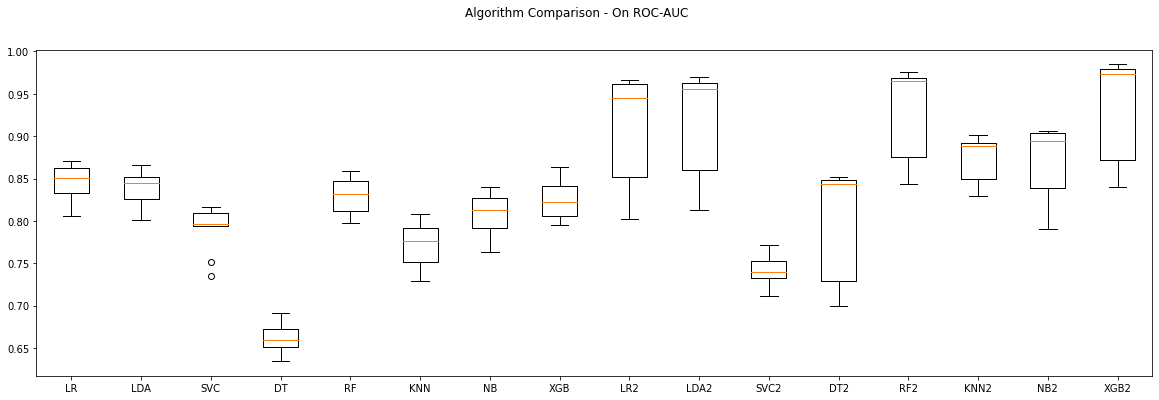

In [53]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))
models2 = []
models2.append(('LR2', LogisticRegression()))
models2.append(('LDA2', LinearDiscriminantAnalysis()))
models2.append(('SVC2', SVC()))
models2.append(('DT2', DecisionTreeClassifier()))
models2.append(('RF2', RandomForestClassifier()))
models2.append(('KNN2', KNeighborsClassifier()))
models2.append(('NB2', BernoulliNB()))
models2.append(('XGB2', XGBClassifier()))

# scoring
results = []
names = []

print('### Normal Data')

# evaluate each model in turn for normal data
for name, model in models:
    if "KNN" in name:
        cv_results = cross_val_score(model, X_Train, Y_Train, cv=10, n_jobs=-3, scoring = 'roc_auc')
    else:
        cv_results = cross_val_score(model, x_train, y_train, cv=10, n_jobs=-3, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print('\n### Oversampled Data')

# evaluate each model in turn for oversampled data
for name, model in models2:
    if "KNN" in name:
        cv_results = cross_val_score(model, X_Trainres, Y_Trainres, cv=10, n_jobs=-3, scoring = 'roc_auc')
    else:
        cv_results = cross_val_score(model, x_trainres, y_trainres, cv=10, n_jobs=-3, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison for normal & oversampled data
fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison - On ROC-AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## 5.2 [HYPERPARAMETER TUNING]

- In overall, the model that shows the top most consistent performances across is the RandomForestClassifier-Oversampled (RF2).
Therefore, we will use this model for further tuning.

## -------------------------- RANDOM FOREST CLASSIFIER ----------------------------

In [19]:
# model fitting for the oversampled data

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_jobs=-2, random_state=101)
rfc2.fit(x_trainres, y_trainres)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-2, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [240]:
# classification report for the oversampled train data

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
print(classification_report(y_trainres, rfc2.predict(x_trainres)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4148
           1       1.00      1.00      1.00      4148

    accuracy                           1.00      8296
   macro avg       1.00      1.00      1.00      8296
weighted avg       1.00      1.00      1.00      8296



In [20]:
# classification report for the oversampled test data

rfc_pred2 = rfc2.predict(x_test)
rfc_predprob2 = rfc2.predict_proba(x_test)
print(classification_report(y_test, rfc_pred2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1026
           1       0.57      0.54      0.56       383

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



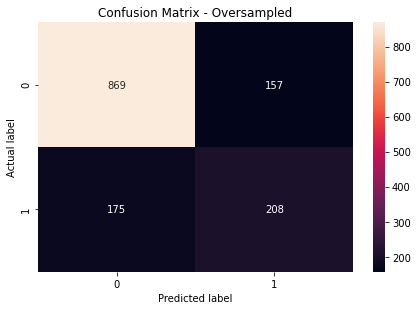

In [21]:
# confusion matrix for oversampled data

cnf_matrix = confusion_matrix(y_test, rfc_pred2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Oversampled')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


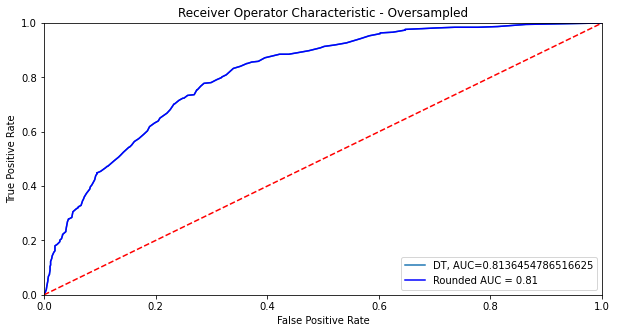

In [22]:
# ROC - AUC Score for oversampled data

from sklearn import metrics
rfc_pred_proba2 = rfc2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  rfc_pred_proba2)
auc = metrics.roc_auc_score(y_test, rfc_pred_proba2)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Oversampled')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [105]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# tuning the hyperparameter range
grid = GridSearchCV(estimator = rfc2,
                    refit = 'recall',
                    param_grid = {
                        'n_estimators':[100,200],
                        'bootstrap': [True,False],
                        'class_weight': [{0:2,1:1},{0:1,1:1.35},None],
                        'max_depth': [5,None],
                        'min_samples_split': [2,5],
                        }, 
                    scoring = 'recall',
                    cv = 4, n_jobs = -1)

# model fitting
grid.fit(x_trainres, y_trainres)

# best hyperparameters
grid.best_params_

{'bootstrap': False,
 'class_weight': {0: 1, 1: 1.35},
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [110]:
# fitting the new hyperparameters
tuned = RandomForestClassifier(n_jobs=-2, random_state=101, bootstrap=False, class_weight= {0: 1, 1: 1.35}, max_depth=5,
                              min_samples_split=5, n_estimators=100)
tuned.fit(x_trainres, y_trainres)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 1.35}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-2, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [241]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
print(classification_report(y_trainres, tuned.predict(x_trainres)))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      4148
           1       0.75      0.92      0.83      4148

    accuracy                           0.81      8296
   macro avg       0.82      0.81      0.80      8296
weighted avg       0.82      0.81      0.80      8296



In [111]:
# tuned's classification report for oversampled data

tuned_pred = tuned.predict(x_test)
tuned_predprob2 = tuned.predict_proba(x_test)
print(classification_report(y_test, tuned_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1026
           1       0.50      0.80      0.62       383

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.73      0.75      1409



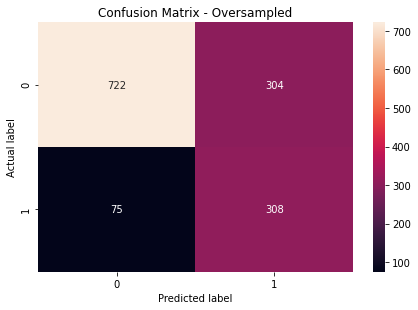

In [112]:
# tuned's confusion matrix for oversampled data

cnf_matrix = confusion_matrix(y_test, tuned_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Oversampled')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


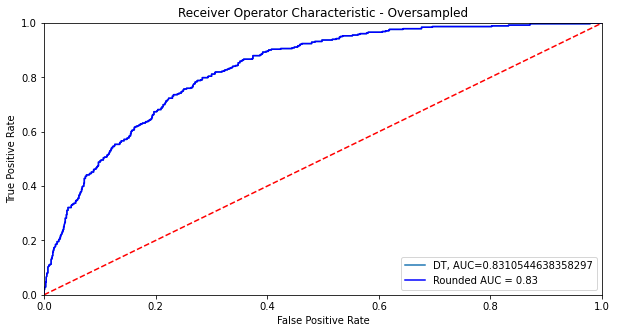

In [113]:
# tuned's ROC - AUC score for oversampled data

from sklearn import metrics
tuned_pred_proba = tuned.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  tuned_pred_proba)
auc = metrics.roc_auc_score(y_test, tuned_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Oversampled')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

- It seems that there are some improvements in our tuned RF2. We can see that the False Negative count has decreased significantly (from 175 to 75 counts), therefore, the Recall score for Positives/the value of 1 has also increased drastically (from 0.54 to 0.80 scoring). Although it's not much but we can still see some improvements in the ROC-AUC scores (from 0.81 to 0.83 scoring).
- Though the Recall score for Positives has increased, the Recall score for the Negatives has decreased. In my opinion, it is still good enough, because what we are trying to minimize here is the False Negatives (by maximizing the Recall score for Positives) since we want too see potential churning customers. We want to be able to detect them early on and give them extra measures to retain them. This will potentially give valuable insights for the company to segment their current customers and act accordingly.
- Lets now take a look at our tuned model's learning curve. 

## 5.3 [LEARNING CURVE & CROSS VALIDATION SCORES]

train mean: 
[0.81675541 0.81635899 0.81126627 0.80965713 0.80543131]
test mean: 
[0.79695999 0.79781246 0.79894832 0.79937425 0.79781317]


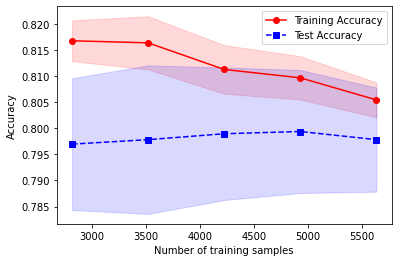

In [242]:
# importing the Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=tuned,
                                                       X=x,
                                                       y=y,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
                                                        
print('train mean: ')
print(train_mean)
                                                        
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)


# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('test mean: ')
print(test_mean)


# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the learning curve we could see that the test accuracy increases with sample size until it hits a point before 5000 samples. After that point, the test accuracy gradually decreases. It could be seen that this point is the optimal amount of train data sample size.
- We could also see that the training accuracy gradually decreases with increase in sample sizes. It might be a signal for a data that has high variance, and increasingly so with larger sample sizes, hence the mode finds difficulty in further generalization of data.

In [243]:
# making training data & test data 70% : 30% ---> to approximate the optimal train data point found in Learnig Curve
from sklearn.model_selection import train_test_split  
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state= 101)

# SMOTE oversampling on splitted data 
from imblearn.over_sampling import SMOTE
from collections import Counter
ytrain = ytrain.astype('int') 
sm = SMOTE(random_state=0, sampling_strategy='minority')
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)
print(sorted(Counter(ytrainres).items()))

[(0, 3628), (1, 3628)]


In [244]:
tuned.fit(xtrainres, ytrainres)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 1.35}, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-2, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [245]:
# tuned's classification report for oversampled data

tuned_pred = tuned.predict(x_test)
tuned_predprob2 = tuned.predict_proba(x_test)
print(classification_report(y_test, tuned_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1026
           1       0.50      0.81      0.62       383

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409



Cross Validation - Oversampled Data scores: [0.86142836 0.82028741 0.83140369 0.86431122 0.91915517 0.90857889
 0.91611955 0.92308655 0.91395146 0.91866597]


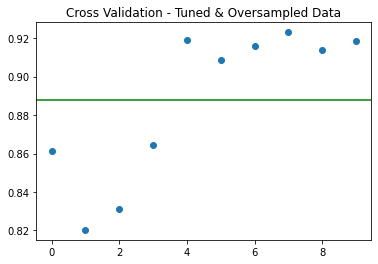

In [251]:
# Cross Validation score for oversampled data

from sklearn.model_selection import cross_val_score
tunedscores = cross_val_score(estimator=tuned,
                        X=x_trainres,
                        y=y_trainres,
                        cv=10,
                        n_jobs=1,
                        scoring = 'roc_auc')
print('Cross Validation - Oversampled Data scores: {}'.format(tunedscores))
plt.title('Cross Validation - Tuned & Oversampled Data')
plt.scatter(np.arange(len(tunedscores)), tunedscores)
plt.axhline(y=np.mean(tunedscores), color='g') # Mean value of cross validation scores
plt.show()

In [252]:
np.mean(tunedscores)

0.887698828139518

- Yes, it appears that Recall score for the Positives increases although by a little (from 0.80 to 0.81) from setting the training data to 70%. Nevertheless, it is still an improvement. The Precision score for the Positives is still low, but since we take more attention on Recall Score, this shall do. The metric that has the biggest priority to be optimized here is the Recall score for the Positives. Why Recall ? Because in this Churn case, the idea of False Negative (the prediction that the customer wont Churn but in actual data, he/she Churns) is more important and dangerous if we neglect it. If this False Negative case is not minimized, the business will lose a lot of revenue because they'll  lose lots of their customers, and with them, the business insights in regards of their services. By having the ability to predict potential Churning customers, the business could then give extra marketing efforts that is very targeted & aims as far as possible to maintin these customers to keepi using their services. Who knows, maybe they will turn into loyalists in the long run. 
- From the Cross Validation scores, we may see that the range starts from 0.82 until 0.92 with the average of tuned scores ROC AUC is 0.89. This is not bad actually, and we should take this in mind for our further steps. 
- Now, after all things are set, let's take a look on our features that's important in our model.

## 5.4 [FEATURE IMPORTANCE]

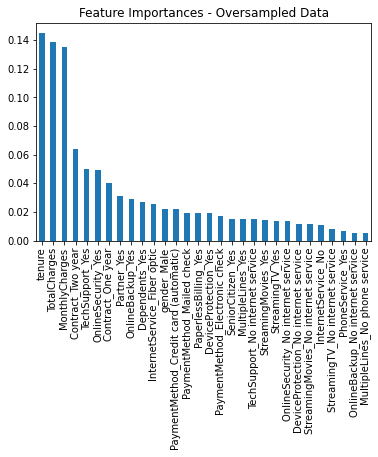

In [114]:
# feature importance for oversampled data

rfc_coef2 = pd.Series(rfc2.feature_importances_, x_trainres.columns).sort_values(ascending= False)
rfc_coef2.plot(kind = 'bar', title='Feature Importances - Oversampled Data')
plt.show()

- From the feature importance, we can see which features that contribute to the most information gained. Those top features  are tenure, TotalCharges, MonthlyCharges, Contract_Two year, and TechSupport_Yes feature. In other words, in terms of information gained, all of these features are important for our model in predicting Churn categories. Indeed, most of these are features that comes from the few features that we have seen which has stronger correlations toward Churn than other features available.

In [116]:
# permutation importance for oversampled data

from eli5 import show_weights
from eli5.sklearn import PermutationImportance
rfcperm2 = PermutationImportance(rfc2, scoring = 'roc_auc', random_state= 101).fit(x_test, y_test)
show_weights(rfcperm2, feature_names = list(x_test.columns))

Weight,Feature
0.0408 ± 0.0149,Contract_Two year
0.0186 ± 0.0083,Contract_One year
0.0164 ± 0.0060,tenure
0.0121 ± 0.0072,TechSupport_Yes
0.0120 ± 0.0067,MonthlyCharges
0.0098 ± 0.0072,OnlineSecurity_Yes
0.0029 ± 0.0068,gender_Male
0.0027 ± 0.0049,PaymentMethod_Mailed check
0.0024 ± 0.0034,PaymentMethod_Credit card (automatic)
0.0022 ± 0.0025,OnlineSecurity_No internet service


- From the permutation feature importance, we can see the green features that contribute the most to the drop of the overall model scores if the the feature's values are randomly shuffled. Those top features are Contract_Two year, Contract_One year, tenure, TechSupport_Yes, MonthlyCharges feature. In other words, in terms of random permutations on ROC-AUC score, all of these features are important for our model in predicting Churn categories. Indeed, most of these are features that comes from the few features that we have seen which has stronger correlations toward Churn than other features available.

## 6.1 [AUTOML ANALYSIS]

- In overall, we may see the tuned model clearly shows some significant improvements compared to the original RandomForestClassifier-Oversampled (RF2). Nevertheless, let's create an AutoML model with our TPOT Classifier and use the output model for further comparison.

## -------------------------- TPOT CLASSIFIER ----------------------------

In [117]:
# let's benchmark our tuned model performance with AutoML
from tpot import TPOTClassifier
tpot = TPOTClassifier(subsample = 0.8, verbosity = 2, warm_start=True, early_stop=20, max_time_mins= 120, n_jobs= -2)

In [118]:
# fitting TPOT to our data original train data
tpot.fit(x_train, y_train)

Generation 1 - Current best internal CV score: 0.8096261606345253
Generation 2 - Current best internal CV score: 0.8105125864092866
Generation 3 - Current best internal CV score: 0.8111787592500079
Generation 4 - Current best internal CV score: 0.8116212338593976
Generation 5 - Current best internal CV score: 0.8120691225073889
Generation 6 - Current best internal CV score: 0.8120691225073889
Generation 7 - Current best internal CV score: 0.8120691225073889
Generation 8 - Current best internal CV score: 0.8120691225073889
Generation 9 - Current best internal CV score: 0.8131762934015174
Generation 10 - Current best internal CV score: 0.8131762934015174
Generation 11 - Current best internal CV score: 0.8131770316795086
Generation 12 - Current best internal CV score: 0.8131770316795086
Generation 13 - Current best internal CV score: 0.8131770316795086
Generation 14 - Current best internal CV score: 0.8136199984742255
Generation 15 - Current best internal CV score: 0.8136199984742255
Gene

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=20, generations=100,
               max_eval_time_mins=5, max_time_mins=120, memory=None,
               mutation_rate=0.9, n_jobs=-2, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=0.8, template=None,
               use_dask=False, verbosity=2, warm_start=True)

In [119]:
# exporting our model results
tpot.export('tpot_TELECOM_CHURN.py')

In [125]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# automl fitting for normal data
automl = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=100.0)),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.2, min_samples_leaf=18, min_samples_split=20, n_estimators=100, subsample=0.4)
)

automl.fit(x_train, y_train)
automl_pred = automl.predict(x_test)
automl_predprob = automl.predict_proba(x_test)

# automl fitting for oversampled data
automl2 = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=100.0)),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.2, min_samples_leaf=18, min_samples_split=20, n_estimators=100, subsample=0.4)
)

automl2.fit(x_trainres, y_trainres)
automl_pred2 = automl2.predict(x_test)
automl_predprob2 = automl2.predict_proba(x_test)

In [127]:
# classification report for autoML & normal data

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, automl_pred))

# classification report for autoML & oversampled data

print(classification_report(y_test, automl_pred2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.69      0.47      0.56       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1026
           1       0.57      0.67      0.61       383

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



## 6.2 [THRESHOLDING]

In [232]:
# using threshold for normal data
t_automl = []
for pred in automl_predprob[:,1]:
    if pred >= 0.35 :
        t_automl.append(1)
    else:
        t_automl.append(0)

# using threshold for oversampled data
t_automl2 = []
for pred in automl_predprob2[:,1]:
    if pred >= 0.35 :
        t_automl2.append(1)
    else:
        t_automl2.append(0)

In [233]:
# classification report for autoML-threshold on normal data

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, t_automl))

# classification report for autoML-threshold on oversampled data

print(classification_report(y_test, t_automl2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1026
           1       0.60      0.64      0.62       383

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1026
           1       0.51      0.81      0.63       383

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



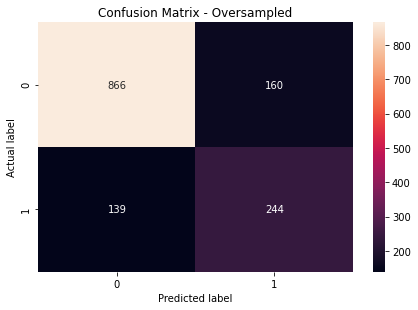

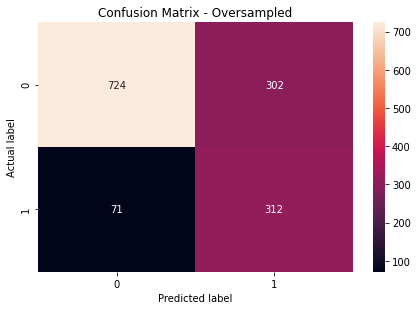

In [234]:
# confusion matrix for autoML-threshold on normal data

cnf_matrix = confusion_matrix(y_test, t_automl)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Oversampled')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


# confusion matrix for autoML-threshold on oversampled data

cnf_matrix = confusion_matrix(y_test, t_automl2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Oversampled')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


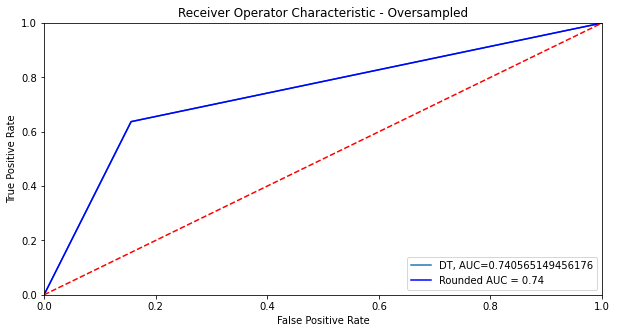

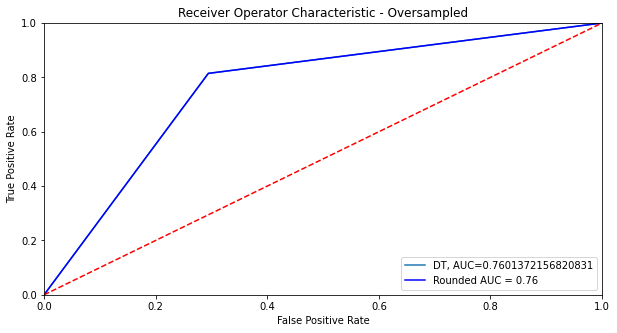

In [235]:
# ROC - AUC score for autoML-threshold on normal data

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, t_automl)
auc = metrics.roc_auc_score(y_test, t_automl)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Oversampled')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# ROC - AUC score for autoML-threshold on oversampled data

fpr, tpr, _ = metrics.roc_curve(y_test,  t_automl2)
auc = metrics.roc_auc_score(y_test, t_automl2)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Oversampled')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the observations we could see:
- In terms of classification reports & False Negatives count, AutoML produce slightly better models than our manually tuned models, especially when it has been given a threshold of 0.35. Nevertheless, the thresholded models produce significantly worse results in terms of ROC-AUC score, which is to be expected.
- It seems that our tuned model is still more preferable than these AutoML models. It could also be the result of our limited AutoML fitting of only 2 hours. It would be deemed wise to have longer fitting hours in the future experiments.
- Since we have decide which model is betterm let's now save the algorithm for further usages.

In [247]:
# saving algorithm for further usage
import pickle
filename = 'telecom_churn_tuned.sav';
pickle.dump(tuned, open(filename, 'wb'))

## 7. [CONCLUSION]

#### 1) On features:
Through all the tests & observations, there are three most frequent features that keeps showing up and they are Tenure, Contract, and Tech_Support features. These feature(s) could be the feature(s) that has better association towards our target variable (Churn) and may prove to be important for further tests & observations.

#### 2) On clusters:
There are two big clusters that is divided fundamentally by their Tenure, MonthlyCharges, and TotalCharges feature. One cluster is higher (in all those features) & the other is lower. This could be an interesting insight that may help the company in further analysis of their current customers.

#### 3) On predictions:
In overall, the best model for our prediction is RandomForestClassifier (Oversampled) that's hyperparameter-tuned. Hyperparameter-tuning surely gives a significant improvement in the model's results. Although far from perfect, this tuned model is recommended for further tests & observations.
